#Discretizations
Here we show how different discretizations work within MasterMSM. An important note is that not all discretizations will be sensible for all systems, but as usual the alanine dipeptide is a good testbed.

In [1]:
%load_ext autoreload
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We start by importing the trajectory.

In [2]:
import mdtraj as md
from mastermsm.trajectory import traj
tr = traj.TimeSeries(top='data/alaTB.gro', traj=['data/protein_only.xtc'])
print tr.mdt

<mdtraj.Trajectory with 10003 frames, 19 atoms, 3 residues, and unitcells>


###Core Ramachandran angle regions
Following previous work we can use core regions in the Ramachandran map to define our states. We use utilities from MDtraj to compute the Phi and Psi dihedrals.

In [3]:
phi = md.compute_phi(tr.mdt)
psi = md.compute_psi(tr.mdt)
res = [x for x in tr.mdt.topology.residues]

Then we run the actual discretization, using only two states for the alpha and extended conformations.

In [4]:
tr.discretize(states=['A', 'E'])
tr.find_keys()

Finally we obtain the MSM

In [5]:
from mastermsm.msm import msm
msm_alaTB = msm.SuperMSM([tr])
for i in [1, 2, 5, 7, 10, 20, 50, 100]:
    msm_alaTB.do_msm(i)
    msm_alaTB.msms[i].do_trans()
    msm_alaTB.msms[i].boots(plot=False)


 Building MSM from 
[['data/protein_only.xtc']]
     # states: 2


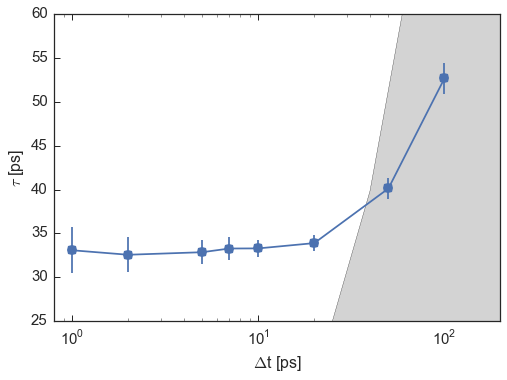

In [6]:
tau_vs_lagt = np.array([[x,msm_alaTB.msms[x].tauT[0],msm_alaTB.msms[x].tau_std[0]] \
               for x in sorted(msm_alaTB.msms.keys())])
fig, ax = plt.subplots()
ax.errorbar(tau_vs_lagt[:,0],tau_vs_lagt[:,1],fmt='o-', yerr=tau_vs_lagt[:,2], markersize=10)
ax.fill_between(10**np.arange(-0.2,3,0.2), 1e-1, 10**np.arange(-0.2,3,0.2), facecolor='lightgray')
ax.set_xlabel(r'$\Delta$t [ps]', fontsize=16)
ax.set_ylabel(r'$\tau$ [ps]', fontsize=16)
ax.set_xlim(0.8,200)
ax.set_ylim(25,60)
_ = ax.set_xscale('log')
#ax.set_yscale('log')

##Fine grid on the Ramachandran map
Alternatively we can make a grid on the Ramachandran map with many more states.

In [7]:
tr.discretize(method="ramagrid")
tr.find_keys()

-2.37041 2.0237
column : 6
row : 41
-2.31718 2.48034
column : 6
row : 44
-2.65259 3.07054
column : 3
row : 49
-2.6892 2.58648
column : 3
row : 45
-2.98582 2.48084
column : 1
row : 44
-1.27456 2.85991
column : 14
row : 47
-1.89491 2.56214
column : 9
row : 45
3.05795 2.91837
column : 49
row : 48
-2.79996 -3.05267
column : 2
row : 0
-2.13477 -3.12632
column : 8
row : 0
-1.76311 2.57148
column : 10
row : 45
-2.33914 2.86488
column : 6
row : 47
-1.7409 -2.67596
column : 11
row : 3
-1.12772 2.84534
column : 16
row : 47
-1.51233 2.77656
column : 12
row : 47
-2.27721 2.08706
column : 6
row : 41
-2.15892 -2.67495
column : 7
row : 3
-1.4913 2.48016
column : 13
row : 44
-2.86135 -2.85495
column : 2
row : 2
-1.74193 2.99288
column : 11
row : 48
-1.56182 2.31218
column : 12
row : 43
-2.32774 -3.01645
column : 6
row : 0
-2.6534 2.57622
column : 3
row : 45
-1.99961 2.29065
column : 9
row : 43
-1.48303 2.69875
column : 13
row : 46
-1.13216 2.39318
column : 15
row : 44
-2.3305 2.8216
column : 6
row : 4

In [ ]:
from mastermsm.msm import msm
msm_alaTB_grid = msm.SuperMSM([tr])
for i in [1, 2, 5, 7, 10, 20, 50, 100]:
    msm_alaTB_grid.do_msm(i)
    msm_alaTB_grid.msms[i].do_trans()
    msm_alaTB_grid.msms[i].boots(plot=False)


 Building MSM from 
[['data/protein_only.xtc']]
     # states: 790


In [ ]:
tau_vs_lagt = np.array([[x,msm_alaTB_grid.msms[x].tauT[0],msm_alaTB_grid.msms[x].tau_std[0]] \
               for x in sorted(msm_alaTB_grid.msms.keys())])
fig, ax = plt.subplots()
ax.errorbar(tau_vs_lagt[:,0],tau_vs_lagt[:,1],fmt='o-', yerr=tau_vs_lagt[:,2], markersize=10)
ax.fill_between(10**np.arange(-0.2,3,0.2), 1e-1, 10**np.arange(-0.2,3,0.2), facecolor='lightgray')
ax.set_xlabel(r'$\Delta$t [ps]', fontsize=16)
ax.set_ylabel(r'$\tau$ [ps]', fontsize=16)
ax.set_xlim(0.8,200)
ax.set_ylim(25,60)
_ = ax.set_xscale('log')
#ax.set_yscale('log')